<a href="https://colab.research.google.com/github/mgraudina/WoTech-2024-PHYTON/blob/main/09_28_L23_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Lesson 23, Topic: Confusion matrix 😕 & Clustering 🎳

1. Create a confusion matrix for titanic dataset
2. Understand what the Central Limit Theorem is and how to demonstrate it using the Numpy library.
3. Create a clustering example of synthetic dataset



### DATA EXTRACTION

In [ ]:
import seaborn as sns
import pandas as pd

titanic_data = sns.load_dataset('titanic')

### DATA REVIEW

In [ ]:
print("Number of passangers:",len(titanic_data))
titanic_data.columns
titanic_data.dtypes

titanic_data['class'].unique()

titanic_data.isnull().sum()

Number of passangers: 891


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


### DATA TRANSFORMATION

In [ ]:
titanic_data['deck'] = titanic_data['deck'].astype(str)
titanic_data['class'] = titanic_data['class'].astype(str)
titanic_data.fillna(0, inplace=True)
titanic_data.drop(['alive', 'alone', 'adult_male', 'deck'], axis=1, inplace=True)

titanic_data.isnull().sum()

titanic_data['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 0], dtype=object)

In [ ]:
# Mapping for embark_town
embark_town_mapping = {'Southampton': 1, 'Cherbourg': 2, 'Queenstown': 3, 0:0}
titanic_data['embark_town'] = titanic_data['embark_town'].map(embark_town_mapping)

# Mapping for sex
sex_mapping = {'male': 0, 'female': 1}
titanic_data['sex'] = titanic_data['sex'].map(sex_mapping)

# Mapping for embarked
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3, 0 : 0}
titanic_data['embarked'] = titanic_data['embarked'].map(embarked_mapping)

# Mapping for class
class_mapping = {'Third': 1, 'First': 2, 'Second': 3}
titanic_data['class'] = titanic_data['class'].map(class_mapping)

# Mapping for who
who_mapping = {'man': 1, 'woman': 2, 'child': 3}
titanic_data['who'] = titanic_data['who'].map(who_mapping)


In [ ]:
titanic_data.isnull().sum() #NO MORE EMPTY VALUES

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


### TRAIN AND TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = titanic_data.drop('survived', axis=1) #Independent variables
y = titanic_data['survived'] #Dependent variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

#### CREATE DATA MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import the model

In [ ]:
model = KNeighborsClassifier() # initialize

In [ ]:
model.fit(X_train, y_train) # train the model

KNeighborsClassifier()

In [ ]:
prediction_knn = model.prediction_knn = model.predict(X_test) # prediction on test dataset, because test dataset the model has not seen

#### How good is the model?

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(prediction_knn, y_test) # = true negatives + true positives / all observations

0.7094972067039106

#### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
cm = confusion_matrix(y_test, prediction_knn) # (true labels, predicted ones)

In [ ]:
print(cm)

[[96 20]
 [32 31]]


In [ ]:
import seaborn
import matplotlib.pyplot as plt

In [ ]:
# visualize a heatmap from cm using seaborn

Text(50.722222222222214, 0.5, 'True labels')

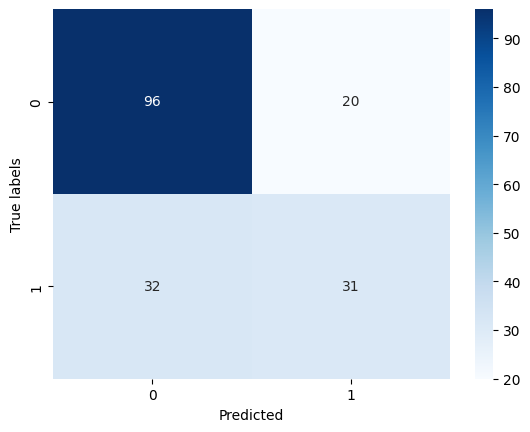

In [ ]:
sns.heatmap(cm, annot = True, cmap ='Blues') # annot - shows data labels
plt.xlabel('Predicted')
plt.ylabel('True labels')


In [ ]:
# Ebow point - point where there is no point to increase number of clusters
# https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
# Next lesson: https://www.w3schools.com/python/python_regex.asp

#### TEAMWORK

1. Look at what is Central Limit Theorem and try to prove/ visualize it using NumPy
2. Watch the movie The Great Hack (https://www.imdb.com/title/tt4736550/)  or read about Cambridge Analytica (https://www.nytimes.com/2018/04/04/us/politics/cambridge-analytica-scandal-fallout.html)



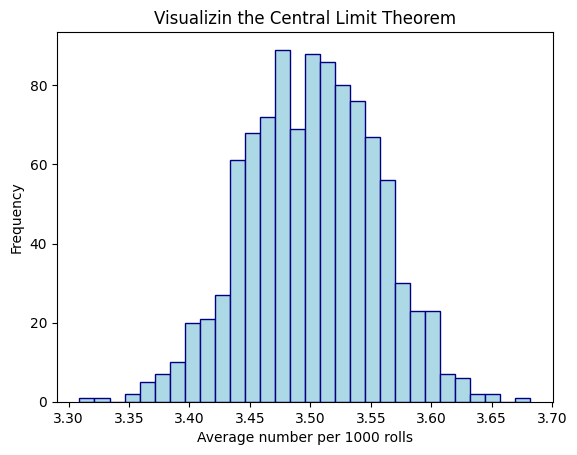

In [ ]:
# Visualizin the Central Limit Theorem

import numpy as np
import matplotlib.pyplot as plt

averages = []

for i in range(1000):
    rolls = np.random.randint(1, 7, 1000)
    average = np.mean(rolls)
    averages.append(average)

plt.hist(averages, bins=30, color='lightblue', edgecolor='navy')
plt.title('Visualizin the Central Limit Theorem')
plt.xlabel('Average number per 1000 rolls')
plt.ylabel('Frequency')
plt.show()